### Neural spikes travelling as pulses via nerves are considered the elementary unit of information propagation in the nervous system of living organisms

identical stereotyped events

spike count rate is the total observed spikes in a trial divided by the duration of the trial. Temporal information lost.

time dependent firing rate solves this > average number of spikes(across trials) in a time bin(delta t) 

## formula

STA is the stimuli preceding a spike, averaged over all stimuli that elicited a spike.

Database-The data is an experimentally recorded set of spikes recorded from the famous H1 motion-sensitive neuron of the fly (Calliphora vicina) from the lab of Dr Robert de Ruyter van Steveninck.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data_H1 = pickle.load(f)
data_H1    

{'stim': array([-111.94824219,  -81.80664062,   10.21972656, ...,    9.78515625,
          24.11132812,   50.25390625]),
 'rho': array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)}

In [3]:
stim= data_H1['stim'] # stimulation vector
rho = data_H1['rho'] # spike train, 1 if spike, 0 if no spike

In [4]:
len(stim), len(rho)

(600000, 600000)

In [5]:
sampling_rate = 500 # Hz
# Length of the signal
signal_length = len(stim)
frequency_resolution = sampling_rate / signal_length
duration = signal_length / sampling_rate
#sampling_period = int(1 / sampling_rate *1000)
sampling_period = 1 / sampling_rate

In [6]:
window_length = .300 # milliseconds
num_timesteps = int(window_length / sampling_period)
num_timesteps

150

STA is the average value of the stimulus right before a spike. Here the window is taken to be 300 ms or 150 time steps. 

The code slices the spike train into windows of 300 ms and calculates the spike count in each window. The spike count is then used to calculate the spike rate. The spike rate is then plotted against the stimulus.

The code slices the preceding 150 indices of the stim array before every spike. Adds these 300 ms segments and tells us whatever was common to all of the stimulus which triggered the spike.

The process is repeated over multiple trials

STA is simply the average of these spike triggering stimulus segments 

In [7]:
def compute_sta(stim, rho, num_timesteps):
    sta = np.zeros(num_timesteps)
    spike_indices = np.where(rho==1)[0]
    spike_indices = spike_indices[spike_indices > num_timesteps]
    num_spikes = len(spike_indices)
    for spike_idx in spike_indices:
        sta += stim[spike_idx-num_timesteps:spike_idx]
    sta /= num_spikes
    return sta

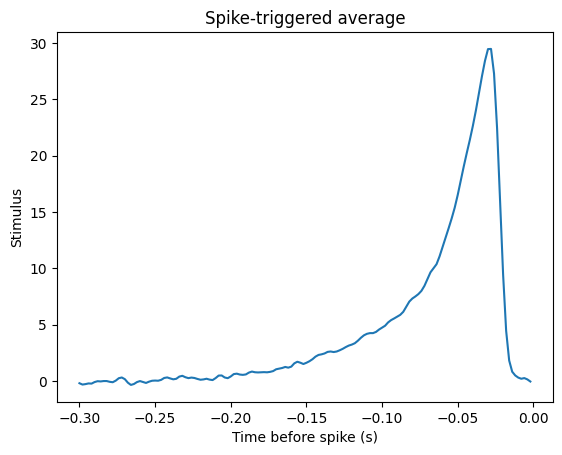

In [8]:
# plotting STA vs time
sta = compute_sta(stim, rho, num_timesteps)
time = np.arange(-num_timesteps, 0) * sampling_period # multiply by sampling period to converts sequence of indices to time values
plt.plot(time, sta)
plt.xlabel('Time before spike (s)')
plt.ylabel('Stimulus')
plt.title('Spike-triggered average')
plt.show()


The neuronal cell membrane acts like a leaky integrator

The system sums it inputs but witha strength that decays exponentially in the past, i.e the filter value decays exponentially over time.
